# `pc_map_to_pc_curve`
This single method can convert either (a) images containing invasion size or (b) invasion pressure results, such as those produced by `injection`, `imbibition` and `drainage`, respectively.  

In [14]:
import matplotlib.pyplot as plt
import numpy as np

import porespy as ps

Generate an image and apply the ``drainage`` function:

In [15]:
np.random.seed(0)
im = ps.generators.blobs(shape=[200, 200], porosity=0.6)
pc = ps.filters.capillary_transform(im, sigma=0.01, theta=180, voxel_size=1e-5)
drn = ps.simulations.drainage(im, pc=pc, steps=25)

## `pc`
The function can accept an image of invasion pressures, such as that produced by `drainage` or `injection`:

In [16]:
pc_curve = ps.metrics.pc_map_to_pc_curve(im=im, pc=drn.im_pc)

The function returns an object with `pc` and `snwp` as attributes which can be plotted directly:

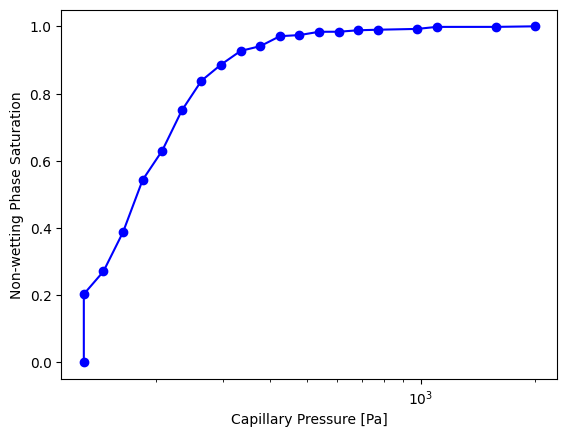

In [17]:
plt.semilogx(pc_curve.pc, pc_curve.snwp, 'b-o')
plt.xlabel('Capillary Pressure [Pa]')
plt.ylabel('Non-wetting Phase Saturation');